In [6]:
%load_ext autoreload

%autoreload 2

import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline



In [7]:
restaurants_raw = pd.read_csv(r"data_hyderabad/105_restaurants.csv")
reviews_raw = pd.read_csv(r"data_hyderabad/10k_reviews.csv")

In [9]:
tokenizer_roberta = AutoTokenizer.from_pretrained("Dizex/InstaFoodRoBERTa-NER")
model_roberta = AutoModelForTokenClassification.from_pretrained("Dizex/InstaFoodRoBERTa-NER")

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
pipe = pipeline("ner", model=model_roberta, tokenizer=tokenizer_roberta)

In [11]:
examples = ["Today I had burger for dinner and kebab for breakfast",
            "We tried the Pizza, Chicken Breast stuffed with spinach, spaghetti followed by deserts."]

examples_df = pd.DataFrame(examples, columns=["text"])
examples_df

,text
0,Today I had burger for dinner and kebab for br...
1,"We tried the Pizza, Chicken Breast stuffed wit..."


In [12]:
reviews_top50 = reviews_raw.head(50)
reviews_top50 = reviews_top50[["Review"]]
reviews_top50

,Review
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...
5,"Ambiance is good, service is good, food is aPr..."
6,"Its a very nice place, ambience is different, ..."
7,Well after reading so many reviews finally vis...
8,"Excellent food , specially if you like spicy f..."
9,Came for the birthday treat of a close friend....


In [13]:
reviews_df = reviews_raw.copy()
reviews_df = reviews_df[["Review"]]
reviews_df = reviews_df.head(50)

In [14]:
ner_entity_results = pipe(list(reviews_df['Review']), aggregation_strategy="simple")

KeyboardInterrupt: 

In [ ]:
def convert_entities_to_list(df: pd.DataFrame, entities: list[list[dict]]) -> pd.DataFrame:
    def extract_entities(text, entity_list):
        ents = []
        for ent in entity_list:
            e = {"start": ent["start"], "end": ent["end"], "label": ent["entity_group"]}
            if ents and (-1 <= ent["start"] - ents[-1]["end"] <= 1) and (ents[-1]["label"] == e["label"]):
                ents[-1]["end"] = e["end"]
                continue
            ents.append(e)
        return [text[e["start"]:e["end"]] for e in ents]

    df['meals'] = [extract_entities(text, entity_list) for text, entity_list in zip(df['Review'], entities)]
    return df

# Apply the function to the examples DataFrame

In [ ]:
convert_entities_to_list(reviews_top50, ner_entity_results)
reviews_top50

,Review,meals
0,"The ambience was good, food was quite good . h...",[]
1,Ambience is too good for a pleasant evening. S...,[]
2,A must try.. great food great ambience. Thnx f...,[Penne Alfredo Pasta]
3,Soumen das and Arun was a great guy. Only beca...,[]
4,Food is good.we ordered Kodi drumsticks and ba...,"[Kodi drumsticks, basket mutton biryani]"
5,"Ambiance is good, service is good, food is aPr...",[]
6,"Its a very nice place, ambience is different, ...",[]
7,Well after reading so many reviews finally vis...,"[corn, Tawa fish, Basket Biryani, biryani]"
8,"Excellent food , specially if you like spicy f...",[]
9,Came for the birthday treat of a close friend....,[Chili honey lotus stem]


In [ ]:
import re

# find the ratings in reviews
example = """
smoked salmon Croissant 4.5/5
mushroom melt 4/5
Smoked salmon bagel 3.5/5
prawn croissant 4.5/5"""


example_ratings = reviews_raw.iloc[881]['Review']

rating_review_pattern = re.compile(r"([a-zA-Z\s]+)\s([\d\.]+\/\d)", re.IGNORECASE)
ratings = rating_review_pattern.findall(example_ratings)
print(ratings)



[('d rate food', '3/5'), ('\r\nAmbience', '4/5'), ('\r\nLocation', '4/5')]


In [ ]:
# Apply the regex pattern to the "Review" column to extract ratings
reviews_raw['Extracted_Ratings'] = reviews_raw['Review'].apply(lambda x: rating_review_pattern.findall(x) if isinstance(x, str) else [])

# Display the DataFrame with the new column
reviews_raw[['Review', 'Extracted_Ratings']]
reviews_raw.sort_values(by='Extracted_Ratings', ascending=False)

NameError: name 'rating_review_pattern' is not defined

```markdown
##EDA

In [ ]:
import matplotlib.pyplot as plt

reviews_ratings = reviews_raw.groupby('Rating').agg({'Review': 'count'})
reviews_ratings

,Review
Rating,
1,1735
1.5,9
2,684
2.5,19
3,1192
3.5,47
4,2373
4.5,69
5,3826


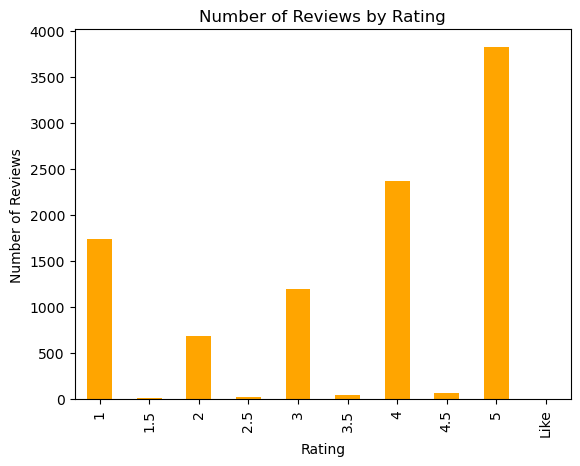

In [ ]:
reviews_ratings.plot(kind='bar', legend=False, color = 'orange')
plt.title('Number of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
non_integer_ratings = reviews_raw[reviews_raw['Rating'].apply(lambda x: '.' in str(x))]
non_integer_ratings

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
975,Cream Stone,Yashwant Darsi,It's too crowded with delivery executives all ...,3.5,"14 Reviews , 83 Followers",11/13/2018 20:09,0
1151,Barbeque Nation,The Foodie Bookworm,We are very satisfied with the food and the se...,4.5,"108 Reviews , 242 Followers",10/25/2018 7:57,0
1188,Barbeque Nation,Deepak,Quick review points\r\n- slippery floor .. be ...,2.5,"2 Reviews , 3 Followers",6/23/2018 14:54,0
2170,Jonathan's Kitchen - Holiday Inn Express & Suites,Devyani Agrawal,Amazing food. The way they serve it will make ...,4.5,"13 Reviews , 67 Followers",2/14/2019 23:23,0
2831,Behrouz Biryani,Nikita.ved,Biryani is good but they didn't deliver ...I h...,2.5,"1 Review , 2 Followers",12/21/2018 13:19,0
...,...,...,...,...,...,...,...
9987,Chinese Pavilion,Deba Das,Initially thought of going to Wonton (Gachibow...,3.5,"31 Reviews , 101 Followers",7/24/2016 16:44,3
9994,Chinese Pavilion,Shiladitya Chaudhury,Chinese Pavilion in Banjara HIlls was the firs...,1.5,"6 Reviews , 3 Followers",6/5/2016 10:49,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3


In [ ]:
ratings_restaurants = reviews_raw.groupby('Restaurant').agg({'Rating': 'value_counts'}).unstack(fill_value=0)
ratings_restaurants.loc['Total'] = ratings_restaurants.sum()
ratings_restaurants

Rating                                   \
Rating                                     1 1.5    2 2.5     3 3.5     4 4.5   
Restaurant                                                                      
10 Downing Street                          7   0    5   0    14   0    49   0   
13 Dhaba                                  22   0    7   0     8   0    27   0   
3B's - Buddies, Bar & Barbecue             2   0    4   0     1   0     2   0   
AB's - Absolute Barbecues                  0   0    2   0     1   0     4   0   
Absolute Sizzlers                         20   0    7   0     9   0    19   0   
...                                      ...  ..  ...  ..   ...  ..   ...  ..   
Yum Yum Tree - The Arabian Food Court     12   0   14   0    16   0    22   0   
Zega - Sheraton Hyderabad Hotel            1   0    2   0     8   0    29   0   
Zing's Northeast Kitchen                  13   0   10   0    13   0    27   0   
eat.fit                                   27   0    7   0    15   0    21   0   
Total                                   1735   9  684  19  1193  47  2373  69   

                                                  
Rating                                    5 Like  
Restaurant                                        
10 Downing Street                        25    0  
13 Dhaba                                 36    0  
3B's - Buddies, Bar & Barbecue           91    0  
AB's - Absolute Barbecues                93    0  
Absolute Sizzlers                        45    0  
...                                     ...  ...  
Yum Yum Tree - The Arabian Food Court    36    0  
Zega - Sheraton Hyderabad Hotel          60    0  
Zing's Northeast Kitchen                 37    0  
eat.fit                                  30    0  
Total                                  3832    1  

[101 rows x 10 columns]

```markdown
## Sentiment Analysis - Transformers


In [8]:
import Preprocessing
import re

In [ ]:
reviews_data = reviews_raw[reviews_raw["Rating"].notna() & reviews_raw["Review"].notna()]
reviews_data.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [23]:
reviews_raw['Review'] = reviews_raw['Review'].astype(str)

In [24]:
reviews_raw['Preprocessed_Review'] = reviews_raw['Review'].apply(lambda x: Preprocessing.main_pipeline(
    x,no_hashtags=False,
    no_newlines=True,
    no_urls=True,
    no_punctuation=False,
    print_output=False, 
    lowercase=False, 
    lemmatized=False,
    stemmed=False, 
    pos_tags_list="no_pos",))

In [25]:
##isue with review 96

reviews_raw

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Madhumathi Mahajan Well to start with nice cou...
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,This place has never disappointed us.. The foo...
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Bad rating is mainly because of "" Chicken Bone..."
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,I personally love and prefer Chinese Food. Had...


In [26]:
reviews_preproc = reviews_raw.copy()

In [27]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer
from scipy.special import softmax

In [ ]:
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_model = AutoModelForSequenceClassification.from_pretrained(model)
sentiment_tokenizer = AutoTokenizer.from_pretrained(model)
#optimus_primer = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer)

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\transformers\modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

In [10]:
reviews_df = reviews_raw.copy()

In [11]:
reviews_df.drop(reviews_df[reviews_df['Rating']=='Like'].index, inplace=True)

In [12]:
reviews_df['Rating'].value_counts()

5      3832
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [14]:
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

In [18]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Rating_label
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,2
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,2
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,1
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,2


In [ ]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=sentiment_tokenizer, max_length=510)

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\transformers\modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

In [113]:
reviews_preproc_500 = reviews_preproc.head(500)

In [114]:
reviews_preproc

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,Sentiment_Label,Sentiment_Score,Rating_label,Sentiment,Sentiment_label
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",positive,0.975001,2,2,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,positive,0.978647,2,2,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,positive,0.988044,2,2,2
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,positive,0.972271,2,2,2
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,positive,0.980803,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Madhumathi Mahajan Well to start with nice cou...,positive,0.870036,1,2,2
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,This place has never disappointed us.. The foo...,positive,0.983094,2,2,2
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Bad rating is mainly because of "" Chicken Bone...",negative,0.531457,0,0,0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,I personally love and prefer Chinese Food. Had...,positive,0.982623,2,2,2


In [78]:
sentiments = []
for review in reviews_preproc['Preprocessed_Review']:
    try:
        sentiment = sentiment_task(review, max_length=510, truncation=True)
        sentiments.append(sentiment[0])
    except RuntimeError as e:
        print(f"RuntimeError for review: {review}\nError: {e}")
        sentiments.append({'label': 'error', 'score': 0.0})

reviews_preproc['Sentiment_Label'] = [sentiment['label'] for sentiment in sentiments]
reviews_preproc['Sentiment_Score'] = [sentiment['score'] for sentiment in sentiments]

In [80]:
reviews_preproc

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,Sentiment_Label,Sentiment_Score,Rating_label,Sentiment
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",positive,0.975001,2,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,positive,0.978647,2,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,positive,0.988044,2,2.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,positive,0.972271,2,2.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,positive,0.980803,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Madhumathi Mahajan Well to start with nice cou...,positive,0.870036,1,2.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,This place has never disappointed us.. The foo...,positive,0.983094,2,2.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Bad rating is mainly because of "" Chicken Bone...",negative,0.531457,0,0.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,I personally love and prefer Chinese Food. Had...,positive,0.982623,2,2.0


In [87]:
reviews_preproc['Sentiment_label'] = reviews_preproc['Sentiment_Label'].map({'negative': 0, 'neutral': 1,'positive': 2})

In [88]:
reviews_preproc.drop(reviews_preproc[reviews_preproc['Rating'] == 'Like'].index, inplace=True)

In [89]:
reviews_preproc['Rating'] = reviews_preproc['Rating'].astype(float)

In [90]:
#0 - negative, 1 - neutral, 2 - positive
reviews_preproc['Rating_label'] = reviews_preproc['Rating'].apply(lambda x: 2 if x > 3.5 else 0 if x < 2.5 else 1)

In [91]:
reviews_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           9950 non-null   object 
 1   Reviewer             9912 non-null   object 
 2   Review               9950 non-null   object 
 3   Rating               9912 non-null   float64
 4   Metadata             9912 non-null   object 
 5   Time                 9912 non-null   object 
 6   Pictures             9950 non-null   int64  
 7   Preprocessed_Review  9950 non-null   object 
 8   Sentiment_Label      9950 non-null   object 
 9   Sentiment_Score      9950 non-null   float64
 10  Rating_label         9950 non-null   int64  
 11  Sentiment            9950 non-null   int64  
 12  Sentiment_label      9950 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB


In [94]:
reviews_preproc.to_csv('reviews_preproc_scores.csv', index=False)

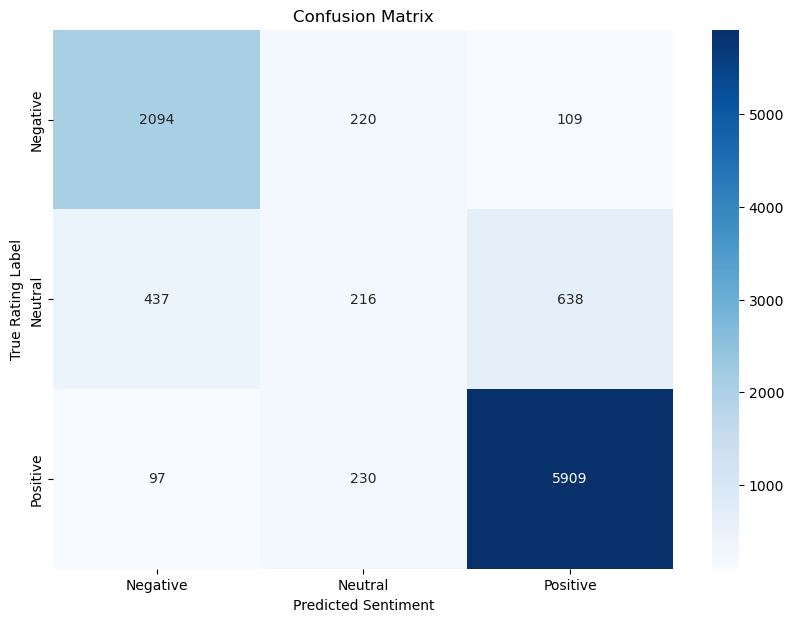

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(reviews_preproc['Rating_label'], reviews_preproc['Sentiment'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Rating Label')
plt.title('Confusion Matrix')
plt.show()

In [96]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1] + conf_matrix[2, 2]) / conf_matrix.sum()
accuracy

0.8260301507537688

In [98]:
conf_matrix[0].sum()

2423

In [101]:
recall_negative = conf_matrix[0, 0] / conf_matrix[0].sum()
recall_neutral = conf_matrix[1, 1] / conf_matrix[1].sum()
recall_positive = conf_matrix[2, 2] / conf_matrix[2].sum()

print(f"Recall for Negative Sentiment: {recall_negative:.2f}, Neutral Sentiment: {recall_neutral:.2f}, Positive Sentiment: {recall_positive:.2f}")

Recall for Negative Sentiment: 0.86, Neutral Sentiment: 0.17, Positive Sentiment: 0.95


In [104]:
precision_negative = conf_matrix[0, 0] / conf_matrix[:, 0].sum()
precision_neutral = conf_matrix[1, 1] / conf_matrix[:, 1].sum()
precision_positive = conf_matrix[2, 2] / conf_matrix[:, 2].sum()

print(f"Precision for Negative Sentiment: {precision_negative:.2f}")
print(f"Precision for Neutral Sentiment: {precision_neutral:.2f}")
print(f"Precision for Positive Sentiment: {precision_positive:.2f}")

Precision for Negative Sentiment: 0.80
Precision for Neutral Sentiment: 0.32
Precision for Positive Sentiment: 0.89


SENTIMENT ANALYSIS WITH PROBABILITIES

In [117]:
def optimus_sentimenter(review):
    encoded_input = sentiment_tokenizer(review, return_tensors='pt', truncation=True, max_length=510)
    sent = sentiment_model(**encoded_input)
    sent_scores = softmax(sent[0][0].detach().numpy())
    sent_scores_dict = {
    'negative': sent_scores[0],
    'neutral': sent_scores[1],
    'positive': sent_scores[2]}
    return sent_scores_dict
    

In [118]:
reviews_sent = reviews_raw.copy()
reviews_sent_500 = reviews_sent.head(500)

In [ ]:
negative_scores = []
neutral_scores = []
positive_scores = []

for review in reviews_sent['Preprocessed_Review']:
    try:
        scores = optimus_sentimenter(review)
        negative_scores.append(scores['negative'])
        neutral_scores.append(scores['neutral'])
        positive_scores.append(scores['positive'])
    except RuntimeError as e:
        print(f"RuntimeError for review: {review}\nError: {e}")
        negative_scores.append(None)
        neutral_scores.append(None)
        positive_scores.append(None)

reviews_sent['negative'] = negative_scores
reviews_sent['neutral'] = neutral_scores
reviews_sent['positive'] = positive_scores

In [163]:
reviews_sent['polarity'] = (reviews_sent['positive'] - reviews_sent['negative'])/(reviews_sent['positive'] + reviews_sent['negative'])

In [164]:
reviews_sent.drop(reviews_sent[reviews_sent['Rating'] == 'Like'].index, inplace=True)

In [165]:
reviews_sent['Scaled_Rating'] = ((reviews_sent['Rating'].astype(float) - 1) / 2) - 1
reviews_sent

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,negative,neutral,positive,polarity,Scaled_Rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",0.004108,0.020891,0.975001,0.991608,1.00
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,0.005603,0.015751,0.978647,0.988615,1.00
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,0.003418,0.008538,0.988044,0.993104,1.00
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,0.006249,0.021480,0.972271,0.987228,1.00
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,0.003587,0.015610,0.980803,0.992711,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,Madhumathi Mahajan Well to start with nice cou...,0.018283,0.111681,0.870036,0.958837,0.00
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,This place has never disappointed us.. The foo...,0.004934,0.011973,0.983094,0.990013,0.75
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Bad rating is mainly because of "" Chicken Bone...",0.531457,0.389869,0.078674,-0.742109,-0.75
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,I personally love and prefer Chinese Food. Had...,0.003832,0.013546,0.982623,0.992231,0.50


In [166]:
corr = reviews_sent[['Scaled_Rating', 'polarity']].corr(method='pearson')
corr

,Scaled_Rating,polarity
Scaled_Rating,1.000000,0.841617
polarity,0.841617,1.000000


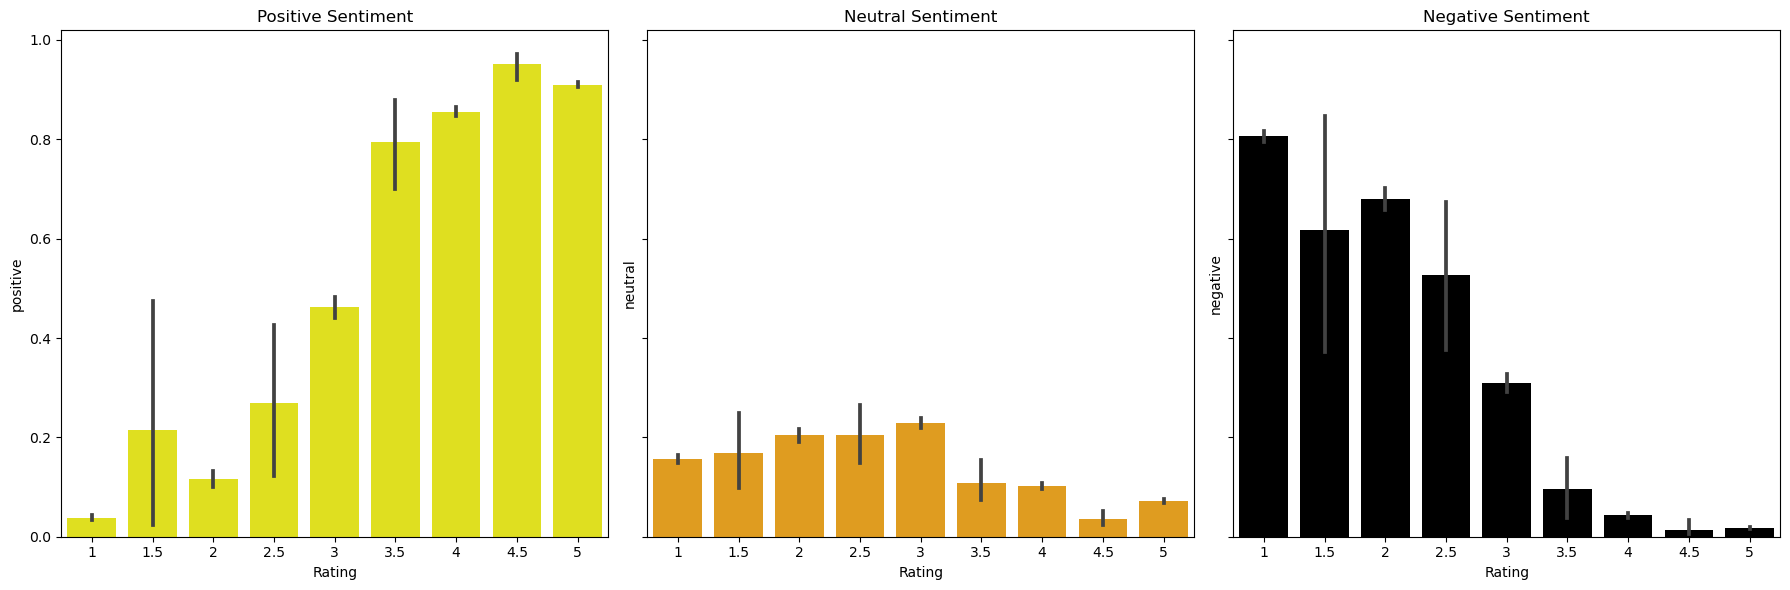

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=reviews_sent, x='Rating', y='positive', color='yellow', label='positive', order=['1', '1.5','2','2.5', '3', '3.5', '4','4.5', '5'], ax=axes[0])
axes[0].set_title('Positive Sentiment')

sns.barplot(data=reviews_sent, x='Rating', y='neutral', color='orange', label='neutral', order=['1', '1.5','2','2.5', '3', '3.5', '4','4.5','5'], ax=axes[1])
axes[1].set_title('Neutral Sentiment')

sns.barplot(data=reviews_sent, x='Rating', y='negative', color='black', label='negative', order=['1', '1.5','2','2.5', '3', '3.5', '4','4.5', '5'], ax=axes[2])
axes[2].set_title('Negative Sentiment')

plt.tight_layout()
plt.show()

In [141]:
reviews_sent.to_csv('reviews_polarity_scores.csv', index=True)

In [142]:
#potential mistakes overly positive
reviews_sent_pos = reviews_sent[(reviews_sent['Rating'] <'4') & (reviews_sent['positive'] > 0.8)].sort_values(by='positive', ascending=False)
reviews_sent_pos

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,negative,neutral,positive,polarity,Scaled_Rating
9498,Dunkin' Donuts,Revathy Mahe Periyasamy,Ate ma first donuts here 😋They we're just amaz...,3.5,"12 Reviews , 95 Followers",8/1/2017 12:30,6,Ate ma first donuts here 😋 They we're just am...,0.002647,0.006705,0.990648,NaN,0.25
6109,Prism Club & Kitchen,Harshet Agarwal,This place a great feel to it \r\nvery vibrant...,3,"34 Reviews , 36 Followers",5/4/2019 18:05,0,This place a great feel to it very vibrant and...,0.003249,0.007733,0.989017,NaN,0.00
8489,T Grill,Krishnamraju Maladi,Great ambience and hut style .....Ragi mudda c...,3.5,"5 Reviews , 43 Followers",11/27/2017 22:30,0,Great ambience and hut style..... Ragi mudda c...,0.002540,0.008587,0.988872,NaN,0.25
9488,Dunkin' Donuts,Shoeb Patel (Food Assassin)™,Taste is Awesome!!!\r\nPrice is affordable and...,3.5,"236 Reviews , 606 Followers",9/6/2017 20:24,0,Taste is Awesome!!! Price is affordable and ok...,0.002949,0.008950,0.988101,NaN,0.25
9192,Cascade - Radisson Hyderabad Hitec City,Preethi P,The place is amazing. The food is of huge vari...,3.5,"32 Reviews , 20 Followers",8/27/2017 23:25,0,The place is amazing. The food is of huge vari...,0.003871,0.009464,0.986665,NaN,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Shah Ghouse Hotel & Restaurant,Bhumika,Shwarma was really good. Biryani was average w...,3,"65 Reviews , 12 Followers",4/30/2019 0:32,0,Shwarma was really good. Biryani was average w...,0.050540,0.146548,0.802912,0.881563,0.00
9039,Arena Eleven,Richa Mundhra,It serves only kebabs. The ambience is nice bu...,3,"126 Reviews , 2458 Followers",4/30/2019 15:16,0,It serves only kebabs. The ambience is nice bu...,0.030283,0.167047,0.802670,NaN,0.00
5119,Hitech Bawarchi Food Zone,Yashwanth Kokkanti,Ordered bone less mini biryani for 160. Taste ...,3,"5 Reviews , 13 Followers",12/23/2018 14:11,0,Ordered bone less mini biryani for 160. Taste ...,0.031854,0.166673,0.801472,NaN,0.00
3304,Club Rogue,Ashok Reddy,You like crowd?!\r\nlike really big crowd ?! T...,3,"9 Reviews , 9 Followers",5/18/2019 23:29,0,You like crowd?! like really big crowd ?! Then...,0.066620,0.132503,0.800877,NaN,0.00


In [143]:
#potential mistakes overly negative

reviews_sent_neg = reviews_sent[(reviews_sent['Rating'] >='4') & (reviews_sent['negative'] > 0.5)].sort_values(by='negative', ascending=False)
reviews_sent_neg

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,negative,neutral,positive,polarity,Scaled_Rating
606,eat.fit,Priyank Sharma,Order no - 1127326452\r\n\r\nOrdered rajma ric...,4,"4 Reviews , 52 Followers",5/19/2019 22:37,0,Order no - 1127326452 Ordered rajma rice and w...,0.933366,0.060899,0.005735,NaN,0.50
4665,Ulavacharu,Yamini Chowdary Gudavalli,This is my favorite restaurant always... But i...,4,"7 Reviews , 12 Followers",12/16/2018 20:18,0,This is my favorite restaurant But i dont know...,0.918816,0.069714,0.011471,NaN,0.50
1576,KFC,Anjanikumar Chakka,Grilled chicken is not good,4,"0 Reviews , 1 Follower",7/29/2018 14:54,0,Grilled chicken is not good,0.912951,0.075804,0.011245,NaN,0.50
2358,Amul,Varun Gupta,straw is not good,5,"3 Reviews , 1 Follower",7/29/2018 18:52,0,straw is not good,0.909059,0.081100,0.009841,NaN,1.00
3505,Green Bawarchi Restaurant,Ankan Ghorai,Food is good but not up to the mark and decor ...,4,"2 Reviews , 6 Followers",4/17/2019 2:56,0,Food is good but not up to the mark and decor ...,0.899118,0.091085,0.009797,NaN,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,Desi Bytes,Ram Chandra,Ordered two times from this place\r\n1st order...,4,"91 Reviews , 114 Followers",6/1/2018 15:08,2,Ordered two times from this place 1st order Ch...,0.515657,0.328316,0.156027,NaN,0.50
2550,Tiki Shack,Vibhu Sharma,I have been to this place twice. My first expe...,4,"10 Reviews , 100 Followers",4/7/2019 14:53,0,I have been to this place twice. My first expe...,0.514478,0.324744,0.160779,NaN,0.50
1691,NorFest - The Dhaba,Sneha Das,I love this place and keep coming back here. P...,5,"14 Reviews , 88 Followers",6/19/2018 19:28,0,I love this place and keep coming back here. P...,0.509276,0.281349,0.209375,NaN,1.00
7252,Labonel,Ketaki Agharkar,"Although, I have not been spoken rudely to by ...",4.5,"20 Reviews , 60 Followers",11/3/2017 17:12,10,"Although, I have not been spoken rudely to by ...",0.505670,0.428084,0.066246,NaN,0.75


EMOTION DETECTION

In [147]:
reviews_sent_500

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Preprocessed_Review,negative,neutral,positive,polarity,Scaled_Rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,"The ambience was good, food was quite good. ha...",0.004108,0.020891,0.975001,0.991608,1.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,Ambience is too good for a pleasant evening. S...,0.005603,0.015751,0.978647,0.988615,1.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,A must try.. great food great ambience. Thnx f...,0.003418,0.008538,0.988044,0.993104,1.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,Soumen das and Arun was a great guy. Only beca...,0.006249,0.021480,0.972271,0.987228,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,Food is good. we ordered Kodi drumsticks and b...,0.003587,0.015610,0.980803,0.992711,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Over The Moon Brew Company,Krishna Bhavanasi,Excellent food and service. Niranjan and Karun...,5,1 Review,4/25/2019 20:28,0,Excellent food and service. Niranjan and Karun...,0.003974,0.013881,0.982144,0.991939,1.0
496,Over The Moon Brew Company,Alka Ranjan,"The place is awesome. Ambience is great. Food,...",5,"2 Reviews , 30 Followers",4/25/2019 18:45,0,"The place is awesome. Ambience is great. Food,...",0.006796,0.009948,0.983256,0.986271,1.0
497,Over The Moon Brew Company,Shubham Rajak,"Went here to catch up with a friend, very near...",3,"5 Reviews , 3 Followers",4/25/2019 17:46,0,"Went here to catch up with a friend, very near...",0.003706,0.068559,0.927735,0.992043,0.0
498,Over The Moon Brew Company,Anupam Acharya,Over the Moon is a brewery where you get a lot...,5,"207 Reviews , 400 Followers",4/25/2019 11:59,6,Over the Moon is a brewery where you get a lot...,0.001901,0.025551,0.972548,0.996099,1.0


In [148]:
model_emotion = f"cardiffnlp/twitter-roberta-base-emotion"
emotion_model = AutoModelForSequenceClassification.from_pretrained(model_emotion)
emotion_tokenizer = AutoTokenizer.from_pretrained(model_emotion)
#optimus_primer = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer)

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\transformers\modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_fi

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:03<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [157]:
import urllib.request
import csv
import numpy as np

In [155]:
# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
labels

['anger', 'joy', 'optimism', 'sadness']

In [161]:
text = "The food was really bad. Onion Salad was not served. Worst taste. Rahtha and the fish ordered smelled very bad, I was completely disappointed with Shah Ghouse biryani"
encoded_input = emotion_tokenizer(text, return_tensors='pt')
output = emotion_model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.8756335 , 0.01024016, 0.00511449, 0.10901193], dtype=float32)

In [162]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) anger 0.8756
2) sadness 0.109
3) joy 0.0102
4) optimism 0.0051
